In [2]:
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)
library(ComplexHeatmap)
library(here)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


here() starts at /Users/xiaoqin/Dropbox/TAPE LAB/Manuscripts/Qin & Ca

# EMD Heatmap (Figure S5G)

In [2]:
# No normalisation
emd_df <- read.csv(here("Figure5_S5", "CellChat Follow-up", "output", "emd", "emd_df_master_concat_no-norm.csv"))
# Z-score
# emd_df <- read.csv(here("output", "emd", "emd_df_master_concat_z-score.csv"))
head(emd_df)

,batch,barcode,genotype,media,replicate,culture,condition,A,K,P,...,X172Yb_cCaspase.8_D387,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B2,37,KP,Ctrl,1,KP_Ctrl,B2_KP_Ctrl_1,0,1,1,...,0.03560515,0.15199418,0.16065854,0.04891102,-0.05988015,0.02078445,0.02031083,0.02940458,-0.05891680,0.02263299
2,B2,38,KP,Ctrl,2,KP_Ctrl,B2_KP_Ctrl_2,0,1,1,...,0.01635363,-0.04605177,-0.05391049,-0.03321864,0.11332234,-0.01111426,-0.01059687,-0.10157886,0.07221974,0.01763125
3,B2,39,KP,Ctrl,3,KP_Ctrl,B2_KP_Ctrl_3,0,1,1,...,-0.05383423,-0.14689802,-0.12865782,-0.02454028,-0.09118100,-0.01651338,0.01720084,0.11530844,-0.04642916,-0.04036754
4,B2,43,KP,WNT3A,1,KP_WNT3A,B2_KP_WNT3A_1,0,1,1,...,-0.16550823,-0.17257251,1.57364925,-0.24063892,-0.30229695,-0.09807629,-0.09554957,0.09982198,-0.81715423,-0.15930923
5,B2,44,KP,WNT3A,2,KP_WNT3A,B2_KP_WNT3A_2,0,1,1,...,-0.11694793,-0.18123758,2.05037608,-0.18985892,-0.44897998,-0.06479257,-0.06279914,0.08705735,-0.75862128,-0.13068257
6,B2,45,KP,WNT3A,3,KP_WNT3A,B2_KP_WNT3A_3,0,1,1,...,-0.10260312,0.06939796,1.75270421,-0.16497980,-0.32146918,0.07010091,0.06788348,0.09182579,-0.69395269,-0.09043251


In [6]:
# ---
# Structure the heatmap
# * The last variable to be arranged will be the first row in the top annotation
# ---

emd_df <- emd_df %>%
    arrange(factor(media, levels = c(
        "Ctrl",
        "WNT3A",
        "WNT5A",
        "TGFB1",
        "TGFB2",
        "EGF",
        "NRG1",
        "EREG",
        "SEMA3A",
        "IGF1",
        "OPN"
    ))) %>%
    arrange(factor(genotype,
        levels =
            c("WT", "A", "K", "KP", "AK", "AKP")
    ))

# emd_df

# ---
# Filter on marker list
# ---

# Full panel
emd_df_full_panel <- emd_df %>% select(starts_with("X"))
head(emd_df_full_panel)

# Metadata
emd_df_metadata <- emd_df %>% select(-starts_with("X"))
head(emd_df_metadata)

# Cell-type markers
cell_type_markers <- read.csv(here("Data", "epi_cell_type_markers.csv"), header = FALSE) %>%
    as.vector() %>%
    magrittr::extract2("V1")
full_panel <- colnames(emd_df)

cell_type_marker_in_panel <- list()
for (marker in cell_type_markers) {
    marker <- str_replace(marker, "-", ".") #*
    marker_to_keep <- full_panel[grepl(marker, full_panel)]
    if (!identical(marker_to_keep, character(0))) {
        cell_type_marker_in_panel <- append(cell_type_marker_in_panel, marker_to_keep)
    }
}

,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X116Cd_GFP,X127I_IdU,X141Pr_pPDPK1_S241,X142Nd_cCaspase.3_D175,X143Nd_C.MYC_1,X145Nd_pNDRG1_T346,X146Nd_pMKK4_SEK1_S257,...,X172Yb_cCaspase.8_D387,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.098760641,0.04624782,0.08415086,0.043777181,0.06608136,0.17813614,-0.05137471,0.028906562,0.09476701,0.06407142,...,-0.03271574,0.11965107,0.17974557,0.036981685,0.06118049,0.025111745,0.025359220,0.22411553,0.16602293,0.04598336
2,0.052302189,-0.02279479,-0.02219841,-0.062856060,-0.16074459,-0.17866008,-0.09662471,-0.067031539,-0.11245241,-0.08308291,...,-0.09203475,-0.04634369,0.10080582,-0.048140522,-0.21330589,-0.056565993,-0.055474336,-0.11367777,-0.17241116,-0.05090847
3,-0.145081134,-0.04973570,-0.07643031,0.033531129,0.10222290,0.03681572,0.11987883,0.042500691,0.03402757,0.02020665,...,0.09795825,-0.08127870,-0.27164757,-0.014841055,0.18560303,0.033057014,0.033172581,-0.10815438,0.07637393,0.01279737
4,0.012774679,-0.11086242,0.03998303,-0.007053157,-0.16422144,0.03425894,-0.01688423,0.009577261,0.02261719,0.01843246,...,0.01629496,-0.02732291,0.07486787,-0.009213009,-0.25931918,0.009425129,0.009481698,0.01950922,0.03439070,-0.02161662
5,0.012429332,0.02723913,-0.03975462,0.023730440,0.33253047,0.06319385,0.06495603,0.050083302,0.01837217,0.04763911,...,0.05041721,0.08235990,-0.04785287,0.037342268,0.23983756,0.041618909,0.041640338,0.02812429,0.03567529,0.06297998
6,0.004331049,0.06420522,-0.02263896,-0.024499650,-0.19798022,-0.08517831,-0.05635078,-0.053413357,-0.03541892,-0.06066222,...,-0.05840665,-0.08160534,-0.01912539,-0.033151708,-0.03642223,-0.044578202,-0.044418002,-0.04249332,-0.03861074,-0.05978063


,batch,barcode,genotype,media,replicate,culture,condition,A,K,P
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,B2,1,WT,Ctrl,1,WT_Ctrl,B2_WT_Ctrl_1,0,0,0
2,B2,2,WT,Ctrl,2,WT_Ctrl,B2_WT_Ctrl_2,0,0,0
3,B2,3,WT,Ctrl,3,WT_Ctrl,B2_WT_Ctrl_3,0,0,0
4,B5,1,WT,Ctrl,1,WT_Ctrl,B5_WT_Ctrl_1,0,0,0
5,B5,2,WT,Ctrl,2,WT_Ctrl,B5_WT_Ctrl_2,0,0,0
6,B5,3,WT,Ctrl,3,WT_Ctrl,B5_WT_Ctrl_3,0,0,0


2%        98% 
-0.7636663  0.3639038

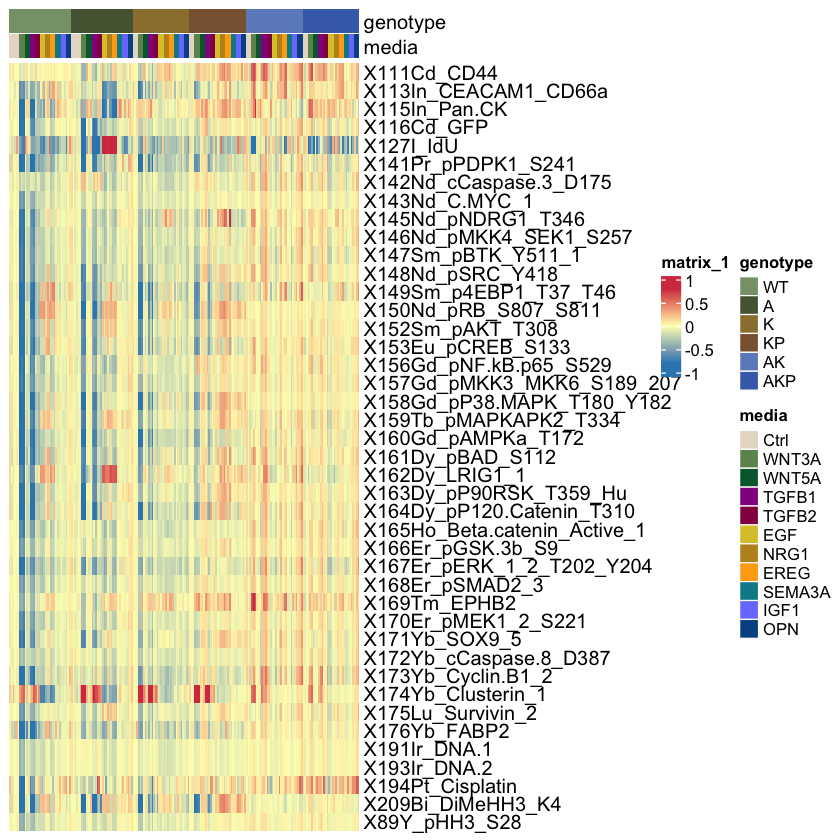

In [7]:
# full panel
mat <- emd_df_full_panel %>%
    as.matrix() %>%
    t()
quantile(mat, c(0.02, 0.98)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-0.8, 0, 0.8), c("#3288BD", "#FEFEBD", "#D53E4F")) # Ferran's colour palette

# cell-type markers
# mat <- emd_df_subset_cell_type %>%
#     as.matrix() %>%
#     t()
# quantile(mat, c(0.05, 0.95)) # Determine the range of the colour scale
# colour <- circlize::colorRamp2(c(-0.6, 0, 0.6), c("#3288BD", "#FEFEBD", "#D53E4F")) # Ferran's colour palette

ha <- HeatmapAnnotation(
    genotype = factor(emd_df_metadata[, "genotype"], levels = c("WT", "A", "K", "KP", "AK", "AKP")),
    media = factor(emd_df_metadata[, "media"],
        levels = c(
            "Ctrl",
        "WNT3A",
        "WNT5A",
        "TGFB1",
        "TGFB2",
        "EGF",
        "NRG1",
        "EREG",
        "SEMA3A",
        "IGF1",
        "OPN"
        )
    ),
    # levels = c("Ctrl", "W", "E")
    col = list(
        genotype = c(
            "WT" = "#87A076", "A" = "#576441",
            "K" = "#9B7F3C", "KP" = "#8B6240",
            "AK" = "#6C8DC6", "AKP" = "#436DB8"
        ),
        media = c(
            "Ctrl" = "#E6DCCB",
            "WNT3A" = "#6E925E",
            "EGF" = "#DBC636",
            "WNT5A" = "#00663A",
            "SEMA3A" = "#008997",
            "TGFB2" = "#941651",
            "TGFB1" = "#932192",
            "IGF1" = "#7A80FF",
            "NRG1" = "#BE9120",
            "EREG" = "#FEAA11",
            "OPN" = "#025394"
        )
    )
)

Heatmap(mat,
    cluster_rows = FALSE,
    cluster_columns = FALSE,
    col = colour,
    top_annotation = ha
)

# Mean EMD

In [4]:
# No normalisation
emd_df <- read.csv(here("Figure5_S5", "CellChat Follow-up", "output", "emd", "emd_df_master_concat_no-norm.csv"))
head(emd_df)

# ---
# Filter on marker list
# ---

# Full panel
emd_df_full_panel <- emd_df %>% select(starts_with("X"))
head(emd_df_full_panel)

# Metadata
emd_df_metadata <- emd_df %>% select(c("genotype", "media"))
head(emd_df_metadata)
dim(emd_df_metadata)


,batch,barcode,genotype,media,replicate,culture,condition,A,K,P,...,X172Yb_cCaspase.8_D387,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B2,37,KP,Ctrl,1,KP_Ctrl,B2_KP_Ctrl_1,0,1,1,...,0.03560515,0.15199418,0.16065854,0.04891102,-0.05988015,0.02078445,0.02031083,0.02940458,-0.05891680,0.02263299
2,B2,38,KP,Ctrl,2,KP_Ctrl,B2_KP_Ctrl_2,0,1,1,...,0.01635363,-0.04605177,-0.05391049,-0.03321864,0.11332234,-0.01111426,-0.01059687,-0.10157886,0.07221974,0.01763125
3,B2,39,KP,Ctrl,3,KP_Ctrl,B2_KP_Ctrl_3,0,1,1,...,-0.05383423,-0.14689802,-0.12865782,-0.02454028,-0.09118100,-0.01651338,0.01720084,0.11530844,-0.04642916,-0.04036754
4,B2,43,KP,WNT3A,1,KP_WNT3A,B2_KP_WNT3A_1,0,1,1,...,-0.16550823,-0.17257251,1.57364925,-0.24063892,-0.30229695,-0.09807629,-0.09554957,0.09982198,-0.81715423,-0.15930923
5,B2,44,KP,WNT3A,2,KP_WNT3A,B2_KP_WNT3A_2,0,1,1,...,-0.11694793,-0.18123758,2.05037608,-0.18985892,-0.44897998,-0.06479257,-0.06279914,0.08705735,-0.75862128,-0.13068257
6,B2,45,KP,WNT3A,3,KP_WNT3A,B2_KP_WNT3A_3,0,1,1,...,-0.10260312,0.06939796,1.75270421,-0.16497980,-0.32146918,0.07010091,0.06788348,0.09182579,-0.69395269,-0.09043251


,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X116Cd_GFP,X127I_IdU,X141Pr_pPDPK1_S241,X142Nd_cCaspase.3_D175,X143Nd_C.MYC_1,X145Nd_pNDRG1_T346,X146Nd_pMKK4_SEK1_S257,...,X172Yb_cCaspase.8_D387,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09254491,-0.07980400,-0.09246864,-0.04363846,0.14319412,0.07168425,0.03886397,-0.01534153,-0.04489067,0.03868706,...,0.03560515,0.15199418,0.16065854,0.04891102,-0.05988015,0.02078445,0.02031083,0.02940458,-0.05891680,0.02263299
2,-0.05592768,0.08416602,0.10503722,0.05122868,-0.08310222,-0.05718007,-0.03101089,0.01478283,0.06423003,0.03185980,...,0.01635363,-0.04605177,-0.05391049,-0.03321864,0.11332234,-0.01111426,-0.01059687,-0.10157886,0.07221974,0.01763125
3,-0.03612479,-0.02638501,-0.03661432,-0.02829420,-0.05801018,-0.09136817,-0.04951615,-0.03651346,-0.05753431,-0.04856636,...,-0.05383423,-0.14689802,-0.12865782,-0.02454028,-0.09118100,-0.01651338,0.01720084,0.11530844,-0.04642916,-0.04036754
4,-0.13148553,-0.58350858,0.10602763,-0.17012118,-0.36883500,-0.60962265,0.11699727,-0.12693902,-0.22278977,-0.23178303,...,-0.16550823,-0.17257251,1.57364925,-0.24063892,-0.30229695,-0.09807629,-0.09554957,0.09982198,-0.81715423,-0.15930923
5,0.22908846,-0.45348279,0.21691979,-0.24317923,-0.22003523,-0.62259536,0.16525505,-0.08878634,-0.32932373,-0.19700646,...,-0.11694793,-0.18123758,2.05037608,-0.18985892,-0.44897998,-0.06479257,-0.06279914,0.08705735,-0.75862128,-0.13068257
6,0.24019948,-0.34527418,0.20663710,-0.19762032,-0.32539539,-0.51876615,0.10114676,-0.08359553,-0.26007637,-0.19648388,...,-0.10260312,0.06939796,1.75270421,-0.16497980,-0.32146918,0.07010091,0.06788348,0.09182579,-0.69395269,-0.09043251


,genotype,media
,<chr>,<chr>
1,KP,Ctrl
2,KP,Ctrl
3,KP,Ctrl
4,KP,WNT3A
5,KP,WNT3A
6,KP,WNT3A


[1] 204   2

In [7]:
# ---
# Cell-type markers
# ---

cell_type_markers <- read.csv(here("Data", "epi_cell_type_markers.csv"), header = FALSE) %>%
    as.vector() %>%
    magrittr::extract2("V1")
full_panel <- colnames(emd_df)

cell_type_marker_in_panel <- list()
for (marker in cell_type_markers) {
    marker <- str_replace(marker, "-", ".") #*
    marker_to_keep <- full_panel[grepl(marker, full_panel)]
    if (!identical(marker_to_keep, character(0))) {
        cell_type_marker_in_panel <- append(cell_type_marker_in_panel, marker_to_keep)
    }
}
emd_df_cell_type <- emd_df %>% select(unlist(cell_type_marker_in_panel))

# ---
# PTMs
# ---

ptm_markers <- read.csv(here("Data", "ptm_markers.csv"), header = FALSE) %>%
    as.vector() %>%
    magrittr::extract2("V1")

ptm_in_panel <- list()
for (marker in ptm_markers) {
    marker <- str_replace(marker, "-", ".") #*
    marker <- str_replace(marker, "_", ".")
    marker_to_keep <- full_panel[grepl(marker, full_panel)]
    if (!identical(marker_to_keep, character(0))) {
        ptm_in_panel <- append(ptm_in_panel, marker_to_keep)
    }
}
emd_df_ptm <- emd_df %>% select(unlist(ptm_in_panel))

In [9]:
# ------
# ---
# Calculate absolute values of EMD and take average
# ---
# ------

# Cell-type-markers
# typeof(emd_df_cell_type) # list
emd_df_cell_type_abs <- abs(emd_df_cell_type)
mean_emd_cell_type <- list(rowMeans(emd_df_cell_type_abs))
mean_emd_cell_type_df <- data.frame(emd_df_metadata, mean_emd_cell_type)
colnames(mean_emd_cell_type_df)[1] <- "genotype"
colnames(mean_emd_cell_type_df)[2] <- "media"
colnames(mean_emd_cell_type_df)[3] <- "meanEMD"
head(mean_emd_cell_type_df)
write.csv(mean_emd_cell_type_df, here("Figure5_S5", "CellChat Follow-up", "output", "meanEMD_cell-type.csv"), row.names = FALSE)

# PTM-markers
# typeof(emd_df_ptm) # list
emd_df_ptm_abs <- abs(emd_df_ptm)
mean_emd_ptm <- list(rowMeans(emd_df_ptm_abs))
mean_emd_ptm_df <- data.frame(emd_df_metadata, mean_emd_ptm)
colnames(mean_emd_ptm_df)[1] <- "genotype"
colnames(mean_emd_ptm_df)[2] <- "media"
colnames(mean_emd_ptm_df)[3] <- "meanEMD"
head(mean_emd_ptm_df)
write.csv(mean_emd_ptm_df, here("Figure5_S5", "CellChat Follow-up", "output", "meanEMD_ptm.csv"), row.names = FALSE)


,genotype,media,meanEMD
,<chr>,<chr>,<dbl>
1,KP,Ctrl,0.07044524
2,KP,Ctrl,0.05332042
3,KP,Ctrl,0.05751875
4,KP,WNT3A,0.39763932
5,KP,WNT3A,0.45788948
6,KP,WNT3A,0.38888203


,genotype,media,meanEMD
,<chr>,<chr>,<dbl>
1,KP,Ctrl,0.05032928
2,KP,Ctrl,0.04167240
3,KP,Ctrl,0.05903894
4,KP,WNT3A,0.36484658
5,KP,WNT3A,0.37607827
6,KP,WNT3A,0.31024497


In [11]:
head(mean_emd_cell_type_ptm_df)

,condition,meanEMD
,<chr>,<dbl>
1,B2_WT_Ctrl_1,0.09789526
2,B2_WT_Ctrl_2,0.09303440
3,B2_WT_Ctrl_3,0.05458279
4,B2_WT_WNT3A_1,0.79774864
5,B2_WT_WNT3A_2,0.76403009
6,B2_WT_WNT3A_3,0.89189795


In [12]:
# ------
# ---
# Joint cell-type-marker and PTM dataframe, 1-dimensional heatmap
# ---
# ------

head(emd_df_cell_type)
head(emd_df_ptm)
emd_df_metadata <- emd_df %>% select("condition")

emd_df_cell_type_ptm <- dplyr::bind_cols(emd_df_cell_type, emd_df_ptm)
emd_df_cell_type_ptm_abs <- abs(emd_df_cell_type_ptm)
mean_emd_cell_type_ptm <- list(rowMeans(emd_df_cell_type_ptm_abs))
mean_emd_cell_type_ptm_df <- data.frame(emd_df_metadata, mean_emd_cell_type_ptm)
colnames(mean_emd_cell_type_ptm_df)[1] <- "condition"
colnames(mean_emd_cell_type_ptm_df)[2] <- "meanEMD"
head(mean_emd_cell_type_ptm_df)
write.csv(mean_emd_cell_type_ptm_df, here("Figure5_S5", "CellChat Follow-up", "output", "meanEMD_cell-type-ptm.csv"), row.names = FALSE)

,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X143Nd_C.MYC_1,X162Dy_LRIG1_1,X169Tm_EPHB2,X171Yb_SOX9_5,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09254491,-0.07980400,-0.09246864,-0.01534153,0.09720041,0.01456935,0.04307385,0.16065854,0.04891102,-0.05988015
2,-0.05592768,0.08416602,0.10503722,0.01478283,-0.02383904,-0.01528690,0.03371301,-0.05391049,-0.03321864,0.11332234
3,-0.03612479,-0.02638501,-0.03661432,-0.03651346,-0.09726274,-0.02877309,-0.06913499,-0.12865782,-0.02454028,-0.09118100
4,-0.13148553,-0.58350858,0.10602763,-0.12693902,-0.35300804,0.23875112,-0.32008818,1.57364925,-0.24063892,-0.30229695
5,0.22908846,-0.45348279,0.21691979,-0.08878634,-0.28776310,0.31922462,-0.29441470,2.05037608,-0.18985892,-0.44897998
6,0.24019948,-0.34527418,0.20663710,-0.08359553,-0.12222686,0.41178539,-0.23994855,1.75270421,-0.16497980,-0.32146918


,X141Pr_pPDPK1_S241,X145Nd_pNDRG1_T346,X146Nd_pMKK4_SEK1_S257,X147Sm_pBTK_Y511_1,X148Nd_pSRC_Y418,X149Sm_p4EBP1_T37_T46,X152Sm_pAKT_T308,X153Eu_pCREB_S133,X156Gd_pNF.kB.p65_S529,X157Gd_pMKK3_MKK6_S189_207,...,X160Gd_pAMPKa_T172,X161Dy_pBAD_S112,X163Dy_pP90RSK_T359_Hu,X164Dy_pP120.Catenin_T310,X165Ho_Beta.catenin_Active_1,X166Er_pGSK.3b_S9,X167Er_pERK_1_2_T202_Y204,X168Er_pSMAD2_3,X170Er_pMEK1_2_S221,X209Bi_DiMeHH3_K4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.07168425,-0.04489067,0.03868706,0.06935732,-0.04785271,-0.04593977,-0.03320433,-0.07060752,0.06260937,0.04579238,...,0.08613881,-0.01597062,0.02422842,0.06408535,0.04646656,0.02097886,0.06527102,0.03999286,0.03354673,-0.05891680
2,-0.05718007,0.06423003,0.03185980,-0.03479012,0.04847139,0.05394262,0.03092721,0.08894638,-0.02841451,0.02663552,...,-0.06320295,0.02603387,0.02925308,-0.05368475,-0.01812875,-0.01400881,-0.03655379,0.01915887,-0.01867177,0.07221974
3,-0.09136817,-0.05753431,-0.04856636,-0.08851767,-0.05082680,-0.07108102,-0.03653188,-0.04002387,-0.09229627,-0.05848773,...,-0.09074643,-0.02415800,-0.03835851,-0.08183071,-0.06505678,-0.02729038,-0.04514037,-0.05933523,-0.04671887,-0.04642916
4,-0.60962265,-0.22278977,-0.23178303,-0.31531673,-0.35953173,-0.60758186,-0.39879820,-0.54126604,-0.26133863,-0.26466408,...,-0.50321277,-0.27118087,-0.28889827,-0.55650617,-0.16023809,-0.10335259,-0.30347899,-0.15302262,-0.20250754,-0.81715423
5,-0.62259536,-0.32932373,-0.19700646,-0.30836859,-0.42020709,-0.68037624,-0.39222807,-0.63614392,0.29504685,-0.24886330,...,-0.50550245,-0.34422583,-0.34832295,-0.59671126,-0.08277872,-0.13335348,-0.26783484,0.14308557,-0.15169469,-0.75862128
6,-0.51876615,-0.26007637,-0.19648388,-0.24440704,-0.35478456,-0.56617209,-0.34008566,-0.48440791,0.23159391,-0.22939446,...,-0.44855743,-0.25632767,-0.26038662,-0.45761117,0.06008761,-0.09364622,-0.24365054,-0.11049783,-0.11548843,-0.69395269


,condition,meanEMD
,<chr>,<dbl>
1,B2_KP_Ctrl_1,0.05661552
2,B2_KP_Ctrl_2,0.04531241
3,B2_KP_Ctrl_3,0.05856388
4,B2_KP_WNT3A_1,0.37509431
5,B2_KP_WNT3A_2,0.40164428
6,B2_KP_WNT3A_3,0.33481905
